In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Admission_predict.csv')

In [4]:
data

,gre,sop,cgpa,admitted
0,337,4.5,9.65,1
1,324,4.0,8.87,1
2,316,3.0,8.00,1
3,322,3.5,8.67,1
4,314,2.0,8.21,0
...,...,...,...,...
395,324,3.5,9.04,1
396,325,3.0,9.11,1
397,330,5.0,9.45,1
398,312,3.5,8.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       400 non-null    int64  
 1   sop       400 non-null    float64
 2   cgpa      400 non-null    float64
 3   admitted  400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB


In [6]:
data.isna().sum()

gre         0
sop         0
cgpa        0
admitted    0
dtype: int64

In [7]:
data.describe()

,gre,sop,cgpa,admitted
count,400.000000,400.000000,400.000000,400.000000
mean,316.807500,3.400000,8.598925,0.547500
std,11.473646,1.006869,0.596317,0.498362
min,290.000000,1.000000,6.800000,0.000000
25%,308.000000,2.500000,8.170000,0.000000
50%,317.000000,3.500000,8.610000,1.000000
75%,325.000000,4.000000,9.062500,1.000000
max,340.000000,5.000000,9.920000,1.000000


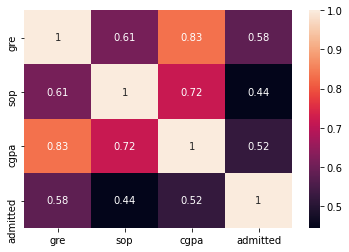

In [38]:
sn.heatmap(data.corr(),annot = True)

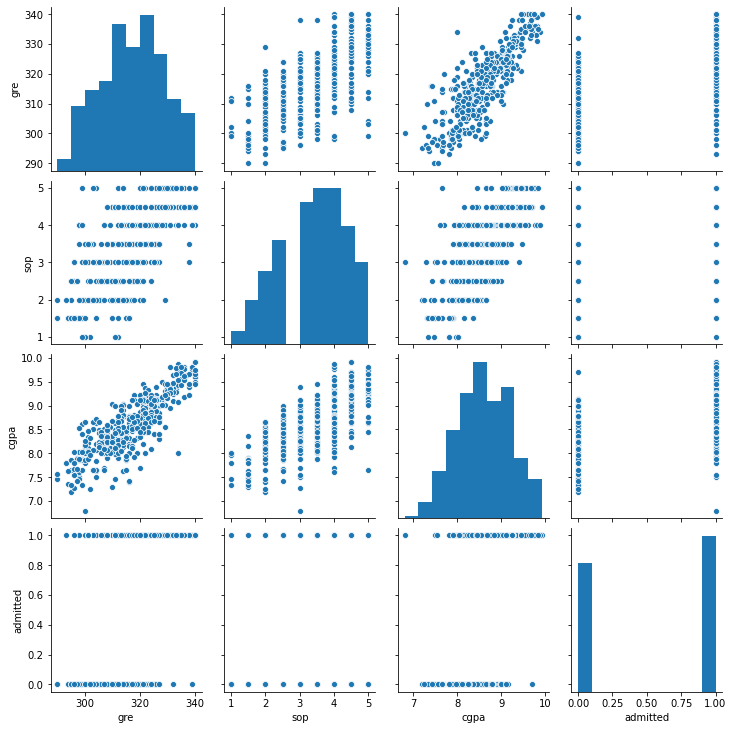

In [39]:
sn.pairplot(data)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
def preprocessing_inputs(df):
    df = df.copy()
    # split data in toX,y
    y = df['admitted']
    X = df.drop(['admitted'],axis = 'columns')
    # train data sets 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    return X_train,X_test,y_train,y_test

In [21]:
X_train,X_test,y_train,y_test = preprocessing_inputs(data)

In [22]:
X_train

,gre,sop,cgpa
212,338,5.0,9.66
395,324,3.5,9.04
350,318,3.0,8.27
334,312,4.5,8.65
10,325,3.5,8.40
...,...,...,...
306,323,4.0,9.10
318,324,2.5,8.80
73,314,4.5,9.04
268,327,4.5,9.14


In [23]:
X_test

,gre,sop,cgpa
145,320,2.0,8.64
195,307,3.0,8.52
392,326,4.0,9.12
386,302,2.5,7.96
346,304,1.5,7.64
...,...,...,...
324,315,3.0,8.33
2,316,3.0,8.00
13,307,4.0,8.00
98,332,5.0,9.24


In [24]:
y_train

212    1
395    1
350    1
334    1
10     1
      ..
306    1
318    1
73     1
268    0
56     0
Name: admitted, Length: 320, dtype: int64

In [25]:
y_test

145    1
195    1
392    1
386    0
346    0
      ..
324    0
2      1
13     1
98     1
181    0
Name: admitted, Length: 80, dtype: int64

In [17]:
y

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: admitted, Length: 400, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
rog = LogisticRegression()

In [28]:
rog.fit(X_train,y_train)

LogisticRegression()

In [30]:
rog.score(X_test,y_test)

0.7375

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [36]:
cross_val_score(svm.SVC(),X_test,y_test,cv = 5)

array([0.6875, 0.625 , 0.625 , 0.625 , 0.625 ])

In [37]:
cross_val_score(svm.SVC(gamma = 'auto', C = 100,kernel = 'linear'),X_test,y_test,cv = 5)

array([0.75  , 0.75  , 0.6875, 0.75  , 0.625 ])

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


In [59]:
models = {
    'Decision tree'    : DecisionTreeClassifier(),
    #'Random_forest'    : RandomForestClassifier(),
   # 'Linear_regression': LinearRegression(),
    #'Ridge'            : Ridge(),
   # 'Lasso'            : Lasso(),
   #'GNB'              : GaussianNB,
    #'MNB'              : MultinomialNB()
}
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + 'Trainned')

Decision treeTrainned


In [60]:
for name,model in models.items():
    print(name + "Accuracy : {:.2f}".format(model.fit(X_test,y_test)))


TypeError: unsupported format string passed to DecisionTreeClassifier.__format__